# Exploratory Data Analysis

### Topic_1. Netflix Movies and TV Shows

#### By. Gukhwan Hyun


## Import dataset from Kaggle 
  * Dataset available at [here](https://www.kaggle.com/shivamb/netflix-shows)

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shivamb/netflix-shows
! unzip netflix-shows.zip

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno

## Loading dataset

In [ ]:
dataset = pd.read_csv('netflix_titles.csv')
dataset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Quick Inspections & fixings
  * df.info()
  * df.shape
  * df.head(), df.tail()
  * df.describe()
  * df.dtypes
  * df['column'].value_counts()


In [ ]:
netflix = dataset.copy()

In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### What we know so far?
  * All except release_year have string dtype
  * Missing values in director, cast, country, date_added, rating, duration
  * "date_added" --> Convert to Datetime format and parse it
  * show_id is the same as index --> may be not necessary?

In [ ]:
# show_id column is the same as index -> Not needed
# netflix = netflix.drop(columns='show_id')
# netflix.head()

#### Handling NA values

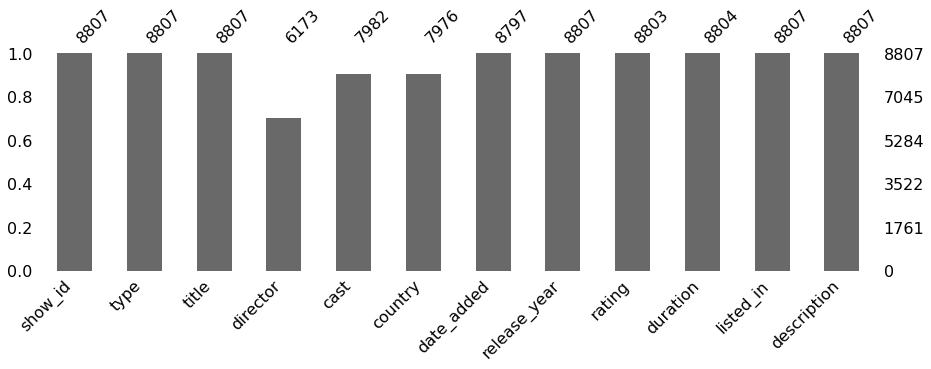

In [ ]:
missingno.bar(netflix, figsize=(15,4));

In [ ]:
# this data cannot be guessed or known
netflix.dropna(subset=['date_added'], inplace=True)

In [ ]:
netflix.director.fillna('Not Available', inplace=True)
netflix.cast.fillna('Not Available', inplace=True)
netflix.country.fillna('Not Available', inplace=True)
netflix.rating.fillna('Not Available', inplace=True)
netflix.duration.fillna('Not Available', inplace=True)

#### Datetime parsing
  * data cleaning to make time readable --> one of the reason which data analyst is needed

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'].str.strip(), format="%B %d, %Y")

In [ ]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


## Feature Engineering 
Manipulate features to create more relevant features (columns)
  * merge, concat 
  * set_index, reset_index
  * stack, unstack, pivot, melt, pivot_table

In [ ]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### What to cosider for a change?
  * country : multiple countries -> one country per a show
  * date_added : split in year, month, day 
  * listed_in : multiple genre -> one genre per a show
  * duration : split time-based and season-based
  * cast : split the names

## Numerical Column Analysis
  * Wide spectrum of year
    * The oldest movie is from 1925
    * The newest movie is from 2021

In [ ]:
netflix.describe()

,release_year
count,8797.000000
mean,2014.183472
std,8.822191
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# movie from year 1925
netflix[netflix['release_year'] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Not Available,Not Available,Not Available,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


### Data Analysis 
  * Check for data distrubutions
    * heavily biased to right (recent year)

In [ ]:
netflix['release_year'].hist();

In [ ]:
fig = px.histogram(netflix, x="release_year")
fig.update_layout(bargap=0.2)
fig.show();

In [ ]:
# Year that movie was added to Netflix server
netflix['date_added'].hist();

In [ ]:
fig = px.histogram(netflix, x="date_added")
fig.update_layout(bargap=0.3)
fig.show();

### Extract Year, Month, Day from "date_added"
  * To see any patterns to adding the movies, TV Shows --> Not much

In [ ]:
# .dt : accessing datetime method
netflix["date_added_year"] = netflix['date_added'].dt.year
netflix["date_added_month"] = netflix['date_added'].dt.month 
netflix["date_added_day"] = netflix['date_added'].dt.day

In [ ]:
fig = px.histogram(netflix, x="date_added", color='date_added_month')
fig.update_layout(bargap=0.3)
fig.show();

#### Year-wise
  * Netflix 성장 시기, 영화의 양과의 상관관계?

In [ ]:
fig = px.histogram(netflix, x="date_added_year")
fig.update_layout(bargap=0.3)
fig.show();

#### Month-wise
  * 전반적으로 비슷 

In [ ]:
fig = px.histogram(netflix, x="date_added_month")
fig.update_layout(bargap=0.3)
fig.show();

#### Day-wise
  * First day of the month adds the most! --> **First insight!**

In [ ]:
fig = px.histogram(netflix, x="date_added_day")
fig.update_layout(bargap=0.3)
fig.show();

## String Column Analysis
  * Does Netflix has more focus on TV Shows than movies in recent years?

  * Understanding what content is available in different countries

In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'date_added_month', 'date_added_day'],
      dtype='object')

### Type distributions


In [ ]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
netflix['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

In [ ]:
fig = px.histogram(netflix, x="date_added_year", color='type')
fig.update_layout(bargap=0.3)
fig.show();

In [ ]:
fig = px.histogram(netflix, x="date_added_month", color='type')
fig.update_layout(bargap=0.3)
fig.show();

In [ ]:
fig = px.histogram(netflix, x="date_added_day", color='type')
fig.update_layout(bargap=0.3)
fig.show();

### Country distributions

In [ ]:
netflix['country'].unique()

In [ ]:
netflix['country'].value_counts()

United States                                             2812
India                                                      972
Not Available                                              830
United Kingdom                                             418
Japan                                                      244
                                                          ... 
Germany, France, United States, Canada, United Kingdom       1
Denmark, Sweden, Israel, United States                       1
Finland, France                                              1
United Kingdom, Poland                                       1
Ireland, United Kingdom, Greece, France, Netherlands         1
Name: country, Length: 749, dtype: int64

In [ ]:
netflix[netflix.title == 'Barbecue']['country']

6233    Australia, Armenia, Japan, Jordan, Mexico, Mon...
Name: country, dtype: object

#### Split countries
  * multiple countries -> one country per a show

In [ ]:
netflix['country'].str.split(",")[:10]

0                                      [United States]
1                                       [South Africa]
2                                      [Not Available]
3                                      [Not Available]
4                                              [India]
5                                      [Not Available]
6                                      [Not Available]
7    [United States,  Ghana,  Burkina Faso,  United...
8                                     [United Kingdom]
9                                      [United States]
Name: country, dtype: object

In [ ]:
netflix['country'].str.split(",", expand=True)[:10]

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,Not Available,None,None,None,None,None,None,None,None,None,None,None
3,Not Available,None,None,None,None,None,None,None,None,None,None,None
4,India,None,None,None,None,None,None,None,None,None,None,None
5,Not Available,None,None,None,None,None,None,None,None,None,None,None
6,Not Available,None,None,None,None,None,None,None,None,None,None,None
7,United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None,None,None,None,None
8,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
9,United States,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
country_count = netflix.copy()
country_count = pd.concat([country_count, netflix['country'].str.split(",", expand=True)], axis=1)
country_count = country_count.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='Country')
country_count = country_count[country_count['Country'].notna()]
country_count['Country'] = country_count['Country'].str.strip()
country_count.drop(columns='variable', inplace=True)
country_count

In [ ]:
country_count['Country'].value_counts()

United States     3684
India             1046
Not Available      830
United Kingdom     805
Canada             445
                  ... 
Sudan                1
Belarus              1
Albania              1
Azerbaijan           1
Latvia               1
Name: Country, Length: 124, dtype: int64

In [ ]:
fig = px.histogram(country_count,'Country', color = 'type').update_xaxes(categoryorder='total descending')
fig.show();

* Noticeable points
  * Movis is more popular in US, India, UK, France
    * Hollywood, Balleywood, movie award hosting countries?
  * Drama is more popular in Korea, Japan, Taiwan

### Genres

In [ ]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25


In [ ]:
netflix['listed_in'].unique()[:10]

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas'], dtype=object)

In [ ]:
genre_count = netflix.copy()
genre_count = pd.concat([genre_count, netflix['listed_in'].str.split(",", expand=True)], axis=1)
genre_count = genre_count.melt(id_vars=['type', 'title'], value_vars=range(3), value_name='Genre')
genre_count = genre_count[genre_count['Genre'].notna()]
genre_count['Genre'] = genre_count['Genre'].str.strip()
genre_count.drop(columns='variable', inplace=True)
genre_count

,type,title,Genre
0,Movie,Dick Johnson Is Dead,Documentaries
1,TV Show,Blood & Water,International TV Shows
2,TV Show,Ganglands,Crime TV Shows
3,TV Show,Jailbirds New Orleans,Docuseries
4,TV Show,Kota Factory,International TV Shows
...,...,...,...
26384,TV Show,Zindagi Gulzar Hai,TV Dramas
26385,Movie,Zinzana,Thrillers
26386,Movie,Zodiac,Thrillers
26387,TV Show,Zombie Dumb,TV Comedies


In [ ]:
cg_count = pd.merge(genre_count, country_count[['Country','title']], how='left', on= 'title')
cg_count

,type,title,Genre,Country
0,Movie,Dick Johnson Is Dead,Documentaries,United States
1,TV Show,Blood & Water,International TV Shows,South Africa
2,TV Show,Ganglands,Crime TV Shows,Not Available
3,TV Show,Jailbirds New Orleans,Docuseries,Not Available
4,TV Show,Kota Factory,International TV Shows,India
...,...,...,...,...
23739,Movie,Zinzana,Thrillers,United Arab Emirates
23740,Movie,Zinzana,Thrillers,Jordan
23741,Movie,Zodiac,Thrillers,United States
23742,TV Show,Zombie Dumb,TV Comedies,Not Available


In [ ]:
cg_count['Country'].value_counts()

United States     6768
India             2804
United Kingdom    1780
Not Available     1721
France             916
                  ... 
Uganda               1
Somalia              1
Bermuda              1
Ecuador              1
Bahamas              1
Name: Country, Length: 124, dtype: int64

most common, least common genre in each country? 

In [ ]:
for nation in cg_count['Country'].value_counts()[:2].index:
  fig = px.histogram(data_frame=cg_count[cg_count['Country'] == nation], 
                  x='Genre', 
                  color = 'Country')
  fig.update_xaxes(categoryorder='total descending')
  fig.show();

### Questions

#### Most common director 

In [ ]:
netflix.director.value_counts()

Not Available             2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
                          ... 
Navdeep Singh                1
Jason Priestley              1
Kristian Levring             1
Rajeev Chaudhari             1
Svetlana Cvetko              1
Name: director, Length: 4529, dtype: int64

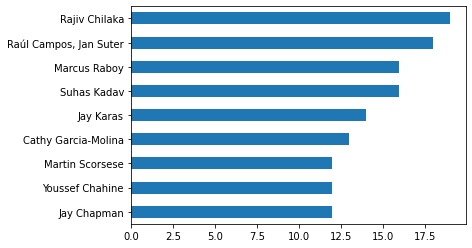

In [ ]:
netflix.director.value_counts()[1:10].sort_values().plot(kind='barh');

#### Which actor/actress was featured most often in Netflix?

In [ ]:
cast_count = netflix.copy()
cast_count = pd.concat([cast_count, netflix['cast'].str.split(",", expand=True)], axis=1)
cast_count = cast_count.melt(id_vars=['title'], value_vars=range(50), value_name='Cast')
cast_count = cast_count[cast_count['Cast'].notna()]
cast_count['Cast'] = cast_count['Cast'].str.strip()
cast_count.drop(columns='variable', inplace=True)
cast_count

,title,Cast
0,Dick Johnson Is Dead,Not Available
1,Blood & Water,Ama Qamata
2,Ganglands,Sami Bouajila
3,Jailbirds New Orleans,Not Available
4,Kota Factory,Mayur More
...,...,...
417233,Black Mirror,Jon Hamm
424110,Social Distance,Ayize Ma'at
426030,Black Mirror,Oona Chaplin
432907,Social Distance,Lovie Simone


In [ ]:
cg_cast_count = pd.merge(cg_count, cast_count, how='left', on= 'title')
cg_cast_count

,type,title,Genre,Country,Cast
0,Movie,Dick Johnson Is Dead,Documentaries,United States,Not Available
1,TV Show,Blood & Water,International TV Shows,South Africa,Ama Qamata
2,TV Show,Blood & Water,International TV Shows,South Africa,Khosi Ngema
3,TV Show,Blood & Water,International TV Shows,South Africa,Gail Mabalane
4,TV Show,Blood & Water,International TV Shows,South Africa,Thabang Molaba
...,...,...,...,...,...
186236,Movie,Zubaan,Music & Musicals,India,Manish Chaudhary
186237,Movie,Zubaan,Music & Musicals,India,Meghna Malik
186238,Movie,Zubaan,Music & Musicals,India,Malkeet Rauni
186239,Movie,Zubaan,Music & Musicals,India,Anita Shabdish


In [ ]:
cg_cast_count.Cast.value_counts()[:10]

Not Available         1848
Anupam Kher            127
Shah Rukh Khan         108
David Attenborough      99
Naseeruddin Shah        97
Akshay Kumar            88
Om Puri                 87
Paresh Rawal            85
Boman Irani             84
Amitabh Bachchan        76
Name: Cast, dtype: int64

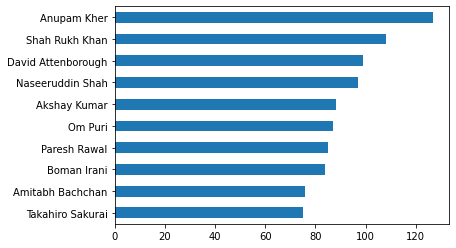

In [ ]:
cg_cast_count.Cast.value_counts()[1:11].sort_values().plot(kind='barh');

##### Country-wise?

In [ ]:
us_stars = cg_cast_count[cg_cast_count['Country'] == 'United States'].groupby('Country')['Cast'].value_counts()
us_stars

Country        Cast             
United States  Not Available        613
               Samuel L. Jackson     41
               Fred Tatasciore       39
               James Franco          36
               Nicolas Cage          35
                                   ... 
               Zoey Siewert           1
               Zosia Mamet            1
               Zsa Zsa Gabor          1
               k.d. lang              1
               Óscar Jaenada          1
Name: Cast, Length: 15084, dtype: int64

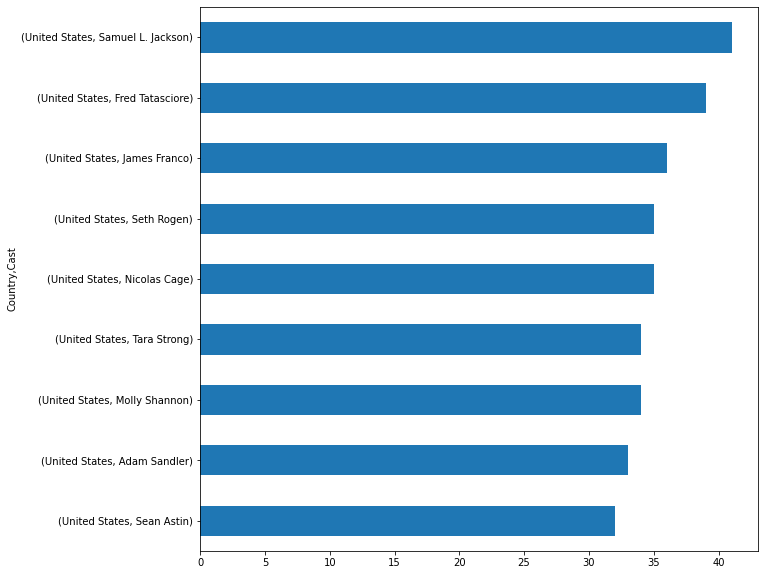

In [ ]:
fig = plt.figure(figsize=(10,10))
us_stars[1:10].sort_values().plot(kind='barh');

In [ ]:
korea_stars = cg_cast_count[cg_cast_count['Country'] == 'South Korea'].groupby('Country')['Cast'].value_counts()
korea_stars

Country      Cast            
South Korea  Sung Dong-il        18
             Kim Won-hae         15
             Kyeong-yeong Lee    15
             Nam Joo-hyuk        15
             Park Hae-joon       15
                                 ..
             Tiki Barber          1
             Tsuyoshi Ihara       1
             Vidyut Jammwal       1
             Vincent Tong         1
             Yuji Kondo           1
Name: Cast, Length: 1402, dtype: int64

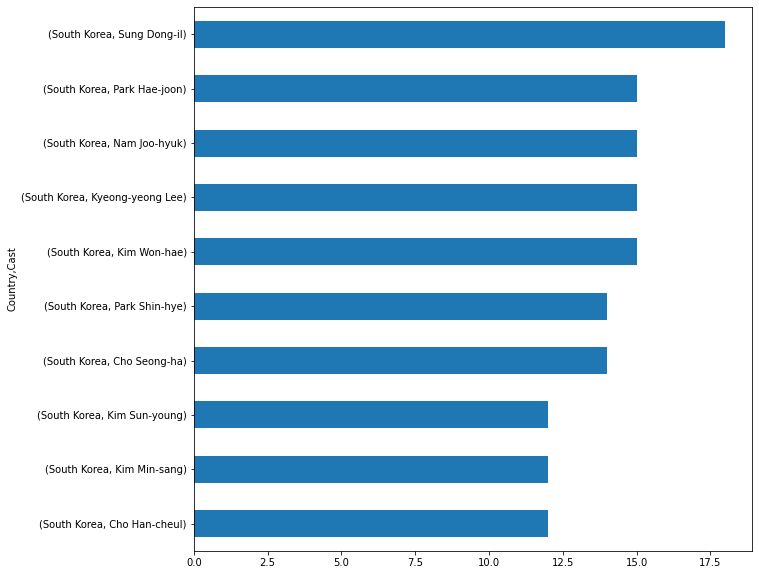

In [ ]:
fig = plt.figure(figsize=(10,10))
korea_stars[:10].sort_values().plot(kind='barh');

#### Most common rating?

In [ ]:
rate_count = netflix.copy()
rate_count = pd.concat([rate_count, netflix['rating'].str.split(",", expand=True)], axis=1)
rate_count = rate_count.melt(id_vars=['title'], value_vars=range(1), value_name='Rate')
rate_count = rate_count[rate_count['Rate'].notna()]
rate_count['Rate'] = rate_count['Rate'].str.strip()
rate_count.drop(columns='variable', inplace=True)
rate_count

,title,Rate
0,Dick Johnson Is Dead,PG-13
1,Blood & Water,TV-MA
2,Ganglands,TV-MA
3,Jailbirds New Orleans,TV-MA
4,Kota Factory,TV-MA
...,...,...
8792,Zodiac,R
8793,Zombie Dumb,TV-Y7
8794,Zombieland,R
8795,Zoom,PG


In [ ]:
eda = pd.merge(cg_cast_count, rate_count, how='left', on= 'title')
eda

,type,title,Genre,Country,Cast,Rate
0,Movie,Dick Johnson Is Dead,Documentaries,United States,Not Available,PG-13
1,TV Show,Blood & Water,International TV Shows,South Africa,Ama Qamata,TV-MA
2,TV Show,Blood & Water,International TV Shows,South Africa,Khosi Ngema,TV-MA
3,TV Show,Blood & Water,International TV Shows,South Africa,Gail Mabalane,TV-MA
4,TV Show,Blood & Water,International TV Shows,South Africa,Thabang Molaba,TV-MA
...,...,...,...,...,...,...
186236,Movie,Zubaan,Music & Musicals,India,Manish Chaudhary,TV-14
186237,Movie,Zubaan,Music & Musicals,India,Meghna Malik,TV-14
186238,Movie,Zubaan,Music & Musicals,India,Malkeet Rauni,TV-14
186239,Movie,Zubaan,Music & Musicals,India,Anita Shabdish,TV-14


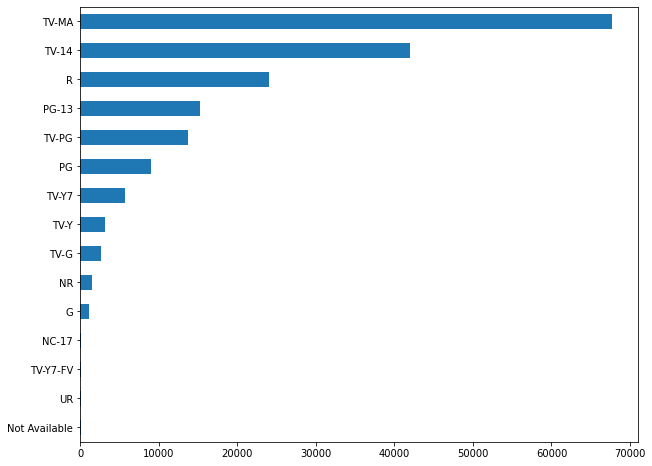

In [ ]:
fig = plt.figure(figsize=(10,8))
eda['Rate'].value_counts()[:15].sort_values().plot(kind='barh');

#### Season duration: 
  * is it really true that a lot of Netflix show end in just 1 season? 

In [ ]:
season_duration = netflix['duration'][netflix['duration'].str.contains('Season')].value_counts()
season_duration

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
12 Seasons       2
15 Seasons       2
11 Seasons       1
17 Seasons       1
Name: duration, dtype: int64

In [ ]:
# Season 1 ratio
1793 / np.sum(season_duration.values)

0.672543135783946

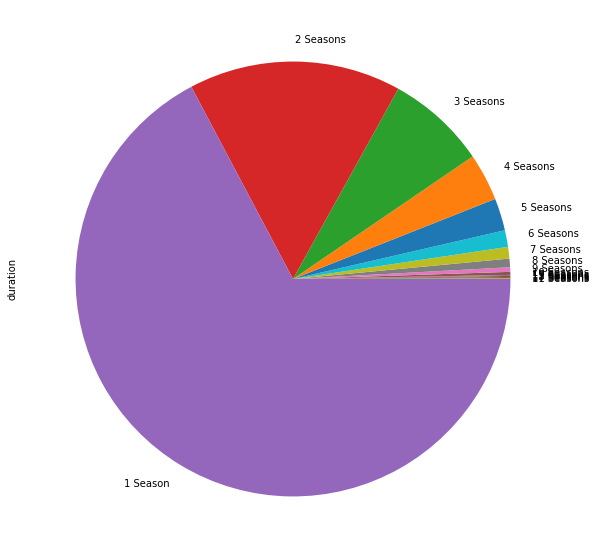

In [ ]:
fig = plt.figure(figsize=(15,10))
season_duration.sort_values().plot(kind='pie');

In [ ]:
time_duration = netflix['duration'][netflix['duration'].str.contains('min')].value_counts()
time_duration

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
201 min      1
237 min      1
212 min      1
230 min      1
205 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
time_duration.sort_index(level=0, ascending=False)

99 min     118
98 min     120
97 min     146
96 min     130
95 min     137
          ... 
103 min    114
102 min    122
101 min    116
100 min    108
10 min       1
Name: duration, Length: 205, dtype: int64

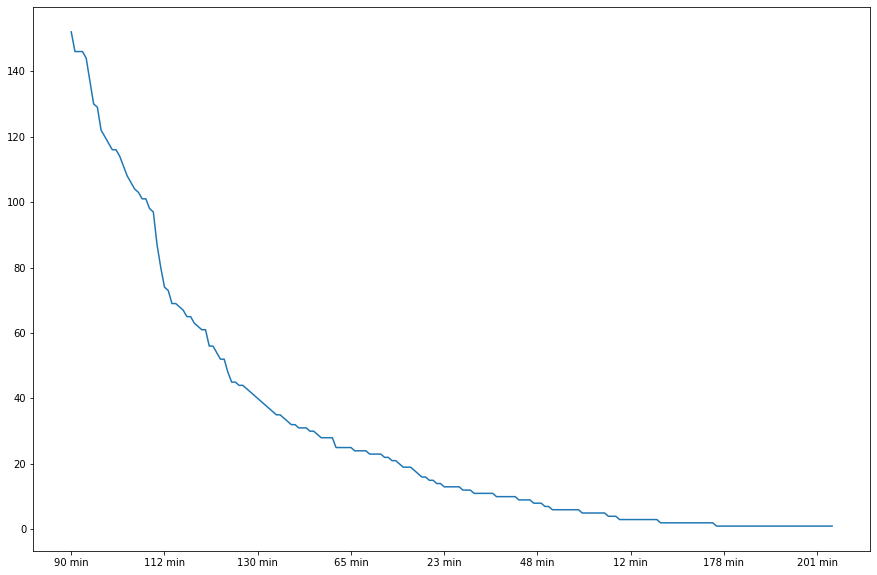

In [ ]:
fig = plt.figure(figsize=(15,10))
time_duration.plot(kind='line');